In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import log_loss, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc , precision_score , classification_report
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')
import warnings
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

In [28]:
df = pd.read_csv('train_PDjVQMB.csv')

In [29]:
df

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1
...,...,...,...,...,...,...,...,...,...,...,...
6645,a8216afd,61,Male,5L - 10L,1354526.19,4,1,2,1,Poor,1
6646,153a306b,42,Female,5L - 10L,596286.54,3,1,2,1,Average,0
6647,d4075a95,29,Male,Less than 5L,979298.19,2,0,2,0,Poor,0
6648,5855b142,66,Female,10L - 15L,395233.65,3,0,2,1,Poor,1


In [30]:
df.dtypes

ID                     object
Age                     int64
Gender                 object
Income                 object
Balance               float64
Vintage                 int64
Transaction_Status      int64
Product_Holdings       object
Credit_Card             int64
Credit_Category        object
Is_Churn                int64
dtype: object

In [31]:
df.Gender.value_counts()

Male      3612
Female    3038
Name: Gender, dtype: int64

In [32]:
df.Income.value_counts()

10L - 15L        1885
5L - 10L         1847
Less than 5L     1573
More than 15L    1345
Name: Income, dtype: int64

In [33]:
df.Credit_Category.value_counts()

Poor       3076
Average    2043
Good       1531
Name: Credit_Category, dtype: int64

In [34]:
df.Is_Churn.value_counts()

0    5113
1    1537
Name: Is_Churn, dtype: int64

In [35]:
df.Product_Holdings.value_counts()

1     3200
2     3182
3+     268
Name: Product_Holdings, dtype: int64

# Label Encoding

In [36]:
label_encoder = preprocessing.LabelEncoder()

df.Gender= label_encoder.fit_transform(df.Gender)
 
df.Gender.unique()

array([0, 1])

In [37]:
df.Income = label_encoder.fit_transform(df.Income)
 
df.Income.unique()

array([1, 2, 3, 0])

In [38]:
df.Credit_Category = label_encoder.fit_transform(df.Credit_Category)
 
df.Credit_Category.unique()

array([0, 2, 1])

In [39]:
df.Product_Holdings = label_encoder.fit_transform(df.Product_Holdings)
 
df.Product_Holdings.unique()

array([0, 1, 2])

In [40]:
df =  df.drop('ID',1)
df

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,36,0,1,563266.44,4,0,0,0,0,1
1,53,0,2,875572.11,2,1,0,1,2,0
2,35,0,3,701607.06,2,1,1,0,2,0
3,43,0,3,1393922.16,0,1,1,1,2,1
4,39,0,3,893146.23,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
6645,61,1,1,1354526.19,4,1,1,1,2,1
6646,42,0,1,596286.54,3,1,1,1,0,0
6647,29,1,2,979298.19,2,0,1,0,2,0
6648,66,0,0,395233.65,3,0,1,1,2,1


In [41]:
df.dtypes

Age                     int64
Gender                  int32
Income                  int32
Balance               float64
Vintage                 int64
Transaction_Status      int64
Product_Holdings        int32
Credit_Card             int64
Credit_Category         int32
Is_Churn                int64
dtype: object

In [46]:
X = df.drop('Is_Churn',1)
Y = df.Is_Churn
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify = Y, test_size = 0.3,random_state=49)

In [47]:
y_train.value_counts()

0    3579
1    1076
Name: Is_Churn, dtype: int64

In [48]:
y_test.value_counts()

0    1534
1     461
Name: Is_Churn, dtype: int64

In [49]:
cols = list(X_train.columns)
cols

['Age',
 'Gender',
 'Income',
 'Balance',
 'Vintage',
 'Transaction_Status',
 'Product_Holdings',
 'Credit_Card',
 'Credit_Category']

In [50]:
scalar = StandardScaler(with_mean=False)
scale_train = pd.DataFrame(scalar.fit_transform(X_train),columns=cols)
scale_test = pd.DataFrame(scalar.transform(X_test),columns=cols)

In [109]:
filename = "scalerr"
pickle.dump(scalar,open(filename,"wb"))

In [52]:
scale_test

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,4.846559,0.000000,0.000000,2.905392,2.757935,2.002177,0.000000,2.107702,2.312362
1,4.743441,0.000000,0.000000,1.691616,3.447418,2.002177,0.000000,2.107702,0.000000
2,5.671505,2.006521,0.000000,0.231751,0.000000,0.000000,1.749357,2.107702,2.312362
3,4.227849,0.000000,0.000000,1.020055,1.378967,2.002177,0.000000,2.107702,0.000000
4,3.402903,2.006521,0.000000,2.581366,1.378967,0.000000,1.749357,2.107702,2.312362
...,...,...,...,...,...,...,...,...,...
1990,5.259032,2.006521,0.911616,1.857763,2.068451,0.000000,0.000000,2.107702,0.000000
1991,3.815376,0.000000,1.823232,0.745221,2.757935,2.002177,0.000000,2.107702,2.312362
1992,4.227849,2.006521,2.734848,0.065786,1.378967,0.000000,1.749357,0.000000,2.312362
1993,5.155914,0.000000,0.911616,1.673185,0.689484,0.000000,1.749357,0.000000,0.000000


In [55]:
final_train_res = scale_train
final_test_res = scale_test

# ML_Models

In [53]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
 
    A =(((C.T)/(C.sum(axis=1))).T)

    B =(C/C.sum(axis=0))

    labels = [0,1]
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(5,3))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(5,3))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(5,3))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

In [73]:
def knn_brute_force(Xtrain,ytrain):
    """
    Function to fine the best k neighbors.
    Input : Training data
    ---
    Output : best value of K
    """
    plt.figure(figsize=(15,10))
    K = [163,193,233,333,399,433,489,533,633,733]#using odd numbers for K in knn
    neigh = KNeighborsClassifier(algorithm='brute')
    parameters = {'n_neighbors':K}
    clf = GridSearchCV(neigh, parameters, cv=5, scoring='roc_auc',return_train_score=True)
    clf.fit(Xtrain, ytrain)

    train_auc= clf.cv_results_['mean_train_score']
    train_auc_std= clf.cv_results_['std_train_score']
    cv_auc = clf.cv_results_['mean_test_score'] 
    cv_auc_std= clf.cv_results_['std_test_score']
    best_k= clf.best_params_
    best_k = list(best_k.values())[0]

    plt.plot(K, train_auc, label='Train AUC')
    plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')
    
    plt.plot(K, cv_auc, label='CV AUC')
    plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
    plt.scatter(K, train_auc, label='Train AUC points')
    plt.scatter(K, cv_auc, label='CV AUC points')
    plt.grid(True)
    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.show()
    return best_k 

def final_knn_brute(Xtrain,ytrain,Xtest,ytest,best_K):
    """
    Function to find the model with best hyperparameter
    Input : Training data, Test Data and best value of k
    ---
    Output : best trained model
    """
    plt.figure(figsize=(12,7))
    neigh = KNeighborsClassifier(n_neighbors=best_K, algorithm='brute')
    neigh.fit(Xtrain, ytrain)
    train_fpr, train_tpr, thresholds = roc_curve(ytrain, neigh.predict_proba(Xtrain)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(ytest, neigh.predict_proba(Xtest)[:,1])
    plt.grid(True)
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()
    return neigh

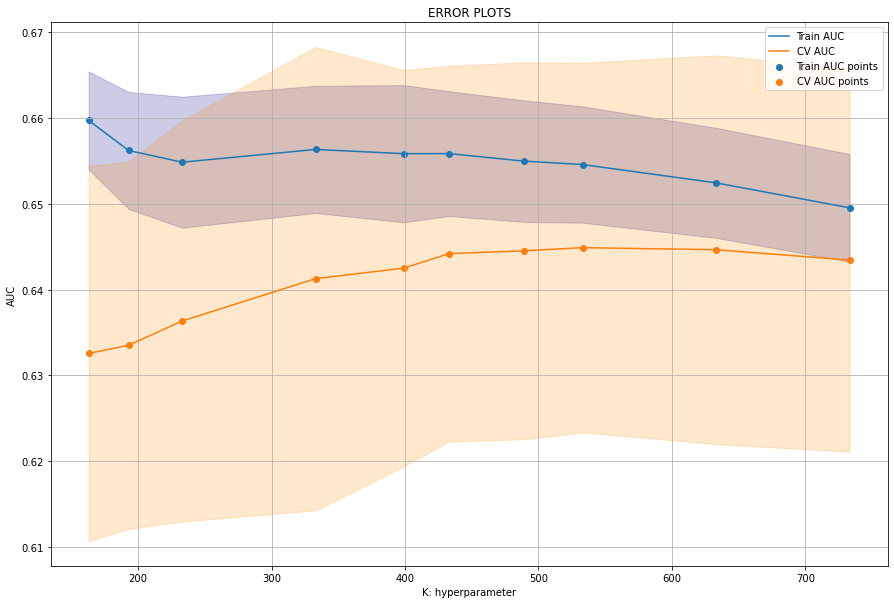

Best K is : 533
Wall time: 38.9 s


In [71]:
%%time
best_K_res = knn_brute_force(final_train_res,y_train)
print('Best K is :', best_K_res)

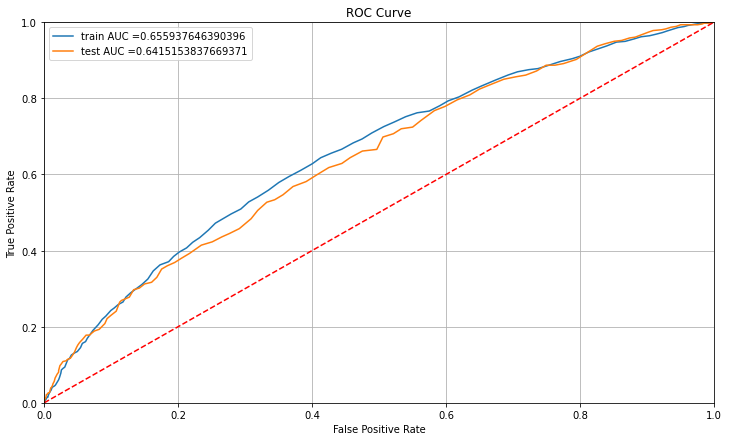

-------------------- Confusion matrix --------------------


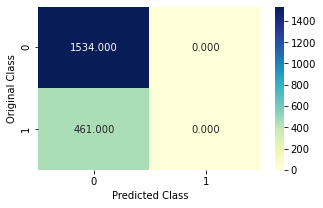

-------------------- Precision matrix (Columm Sum=1) --------------------


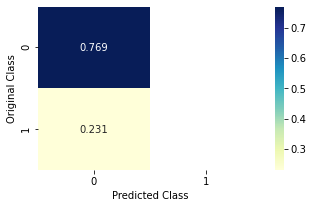

-------------------- Recall matrix (Row sum=1) --------------------


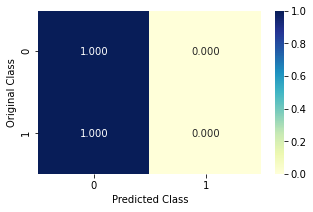

In [74]:
knn_brutemodel_res = final_knn_brute(final_train_res,y_train,final_test_res, y_test,best_K_res)
plot_confusion_matrix(y_test,knn_brutemodel_res.predict(final_test_res))

# KNN FAILED :(

# Logistic Regression

In [75]:
def logit(Xtrain,ytrain):
    """
    Function to find the best hyperparameter
    Input : Training Dataset
    ---
    Output : best hyperparameter
    """
    parameters = [{'C': [10**x for x in range(-4,5)]}]
    K =[10**x for x in range(-4,5)]
    K = np.log10(K)
    
    log= LogisticRegression(class_weight = 'balanced')
    clf = GridSearchCV(log, parameters, cv=5, scoring='roc_auc',return_train_score=True)
    clf.fit(Xtrain, ytrain)

    train_auc= clf.cv_results_['mean_train_score']
    train_auc_std= clf.cv_results_['std_train_score']
    cv_auc = clf.cv_results_['mean_test_score'] 
    cv_auc_std= clf.cv_results_['std_test_score']
    lamb= clf.best_params_
    lamb = list(lamb.values())[0]

    plt.plot(K, train_auc, label='Train AUC')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')
    
    plt.plot(K, cv_auc, label='CV AUC')
    plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
    plt.scatter(K, train_auc, label='Train AUC points')
    plt.scatter(K, cv_auc, label='CV AUC points')
    plt.grid(True)
    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.show()
    return lamb

def final_logl2(Xtrain,ytrain,Xtest,ytest,best_c):
    """
    Function to find the model with best hyperparameter
    Input : Training data, Test Data and best value of c
    ---
    Output : best trained model
    """
    logl2 = LogisticRegression(C= best_c,class_weight = 'balanced')
    logl2.fit(Xtrain, ytrain)
    train_fpr, train_tpr, thresholds = roc_curve(ytrain, logl2.predict_proba(Xtrain)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(ytest, logl2.predict_proba(Xtest)[:,1])
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.grid(True)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()
    return logl2


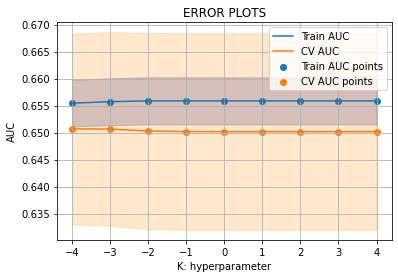

best c using L2 : 0.0001
Wall time: 3.02 s


In [76]:
%%time
best_c_res = logit(final_train_res,y_train)
print('best c using L2 :',best_c_res)

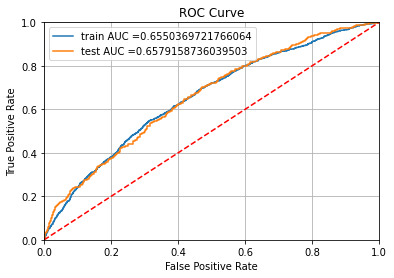

-------------------- Confusion matrix --------------------


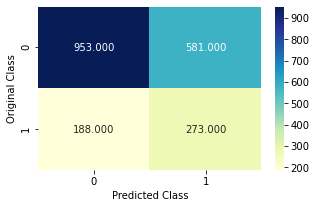

-------------------- Precision matrix (Columm Sum=1) --------------------


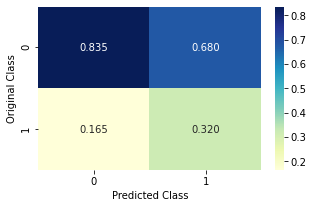

-------------------- Recall matrix (Row sum=1) --------------------


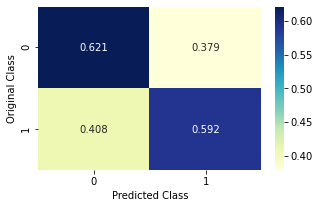

In [77]:
log_model_res= final_logl2(final_train_res,y_train,final_test_res, y_test,best_c_res)
plot_confusion_matrix(y_test,log_model_res.predict(final_test_res))

In [99]:
def dtc(Xtrain,ytrain):
    """
    Function to find the best hyperparameter 
    Returns : best parameters of DecisionTree Calssifier
    ---
    Input : Dataset
    """
    max_depth = [1,2,3,4,5,10,20]
    min_samples_split = [100,130,140,160,190,220,250]
    parameters = {'max_depth': max_depth, 'min_samples_split' :min_samples_split}
    clftree = DecisionTreeClassifier(class_weight = 'balanced')
    clf = GridSearchCV(clftree,parameters,cv=5, scoring='roc_auc',return_train_score=True)
    clf.fit(Xtrain,ytrain)
    tab = pd.DataFrame(clf.cv_results_)
    import seaborn as sns
    plt.figure(figsize=(15, 8))
    max_scores = tab.groupby(['param_max_depth','param_min_samples_split']).max()
    max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
    sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g')
    plt.title('Grid Search CV Score on Train and Test Data')
    plt.show()
    best_parameter= clf.best_params_
    print('Best depth: ', clf.best_estimator_.max_depth)
    print('Best samples split: ', clf.best_estimator_.min_samples_split)
    return clf.best_estimator_.max_depth, clf.best_estimator_.min_samples_split

def final_tree( Xtrain ,ytrain ,Xtest ,ytest , param1 , param2):
    """
    Returns : Model
    ---
    Input : Train dataset, Test Dataset , best parameters
    """
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt
    from sklearn.tree import DecisionTreeClassifier

    clftre = DecisionTreeClassifier(class_weight='balanced',min_samples_split=param1, max_depth=param2)
    clftre.fit(Xtrain,ytrain)
    train_fpr, train_tpr, thresholds = roc_curve(y_train, clftre.predict_proba(Xtrain)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(y_test, clftre.predict_proba(Xtest)[:,1])
    
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.grid(True)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()
    return  clftre

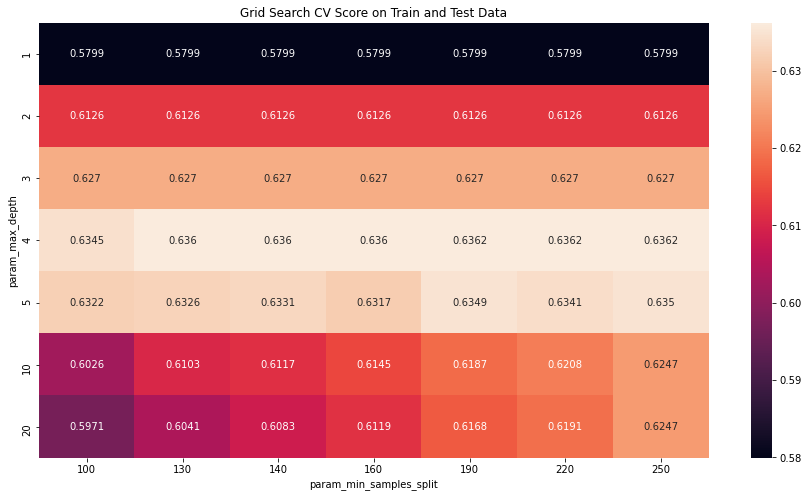

Best depth:  4
Best samples split:  190
Wall time: 3.25 s


In [100]:
%%time
best_depth_dt_res, best_samle_split_dt_res = dtc(final_train_res,y_train)

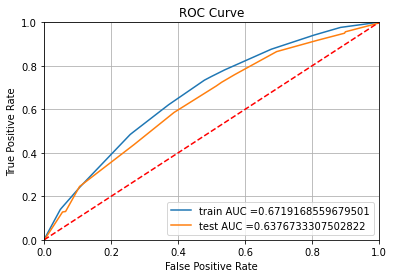

-------------------- Confusion matrix --------------------


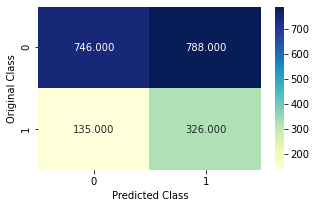

-------------------- Precision matrix (Columm Sum=1) --------------------


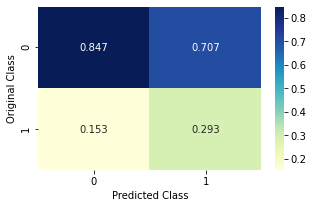

-------------------- Recall matrix (Row sum=1) --------------------


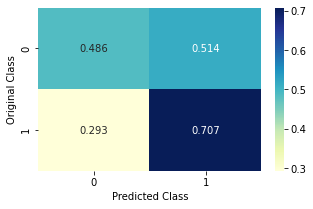

In [101]:
dt_res= final_tree(final_train_res,y_train, final_test_res, y_test,best_samle_split_dt_res,best_depth_dt_res)
plot_confusion_matrix(y_test,dt_res.predict(final_test_res))

In [102]:
import pickle
filename = "logistic.sav"
pickle.dump(log_model_res, open(filename, 'wb'))

In [104]:
filename = "dt.sav"
pickle.dump(dt_res, open(filename,"wb"))